# <center>CITS5508 Lab sheet 3: Project 2</center>

**Name: Manh Duy Thai Nguyen**<br>
**Student number: 21986407**<br>
**Date created:** March 28th 2020<br>
**Last modified:** April 17th 2020<br>

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

Data provided from: https://archive.ics.uci.edu/ml/datasets/Parkinsons


# 0. Environment Setup

Importing packages

In [0]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# 1. Data Loading, Cleaning & Visualisation

In this section the data file is read into a pandas dataframe. The first couple of rows are displayed showing all the columns in the data. Data is then cleaned and visualised using histograms.

## Data Loading

Reading the data in and displaying it as a table.

In [0]:
# Set up global variables for the data
dataPath = "parkinsons.data"

# Read csvs into pandas
dataTable = pd.read_csv(dataPath)

In [3]:
# Print out the table to see what it looks like
dataTable.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Data Cleaning

Looking at data and the information from the parkinsons.names file we can see that the data is balanced with an equal amount of instances for each feature. I don't believe there is a need to remove any columns due to this. Furthermore there is no duplicate data and other errors which furthers reinforces that there are no columns to be removed.

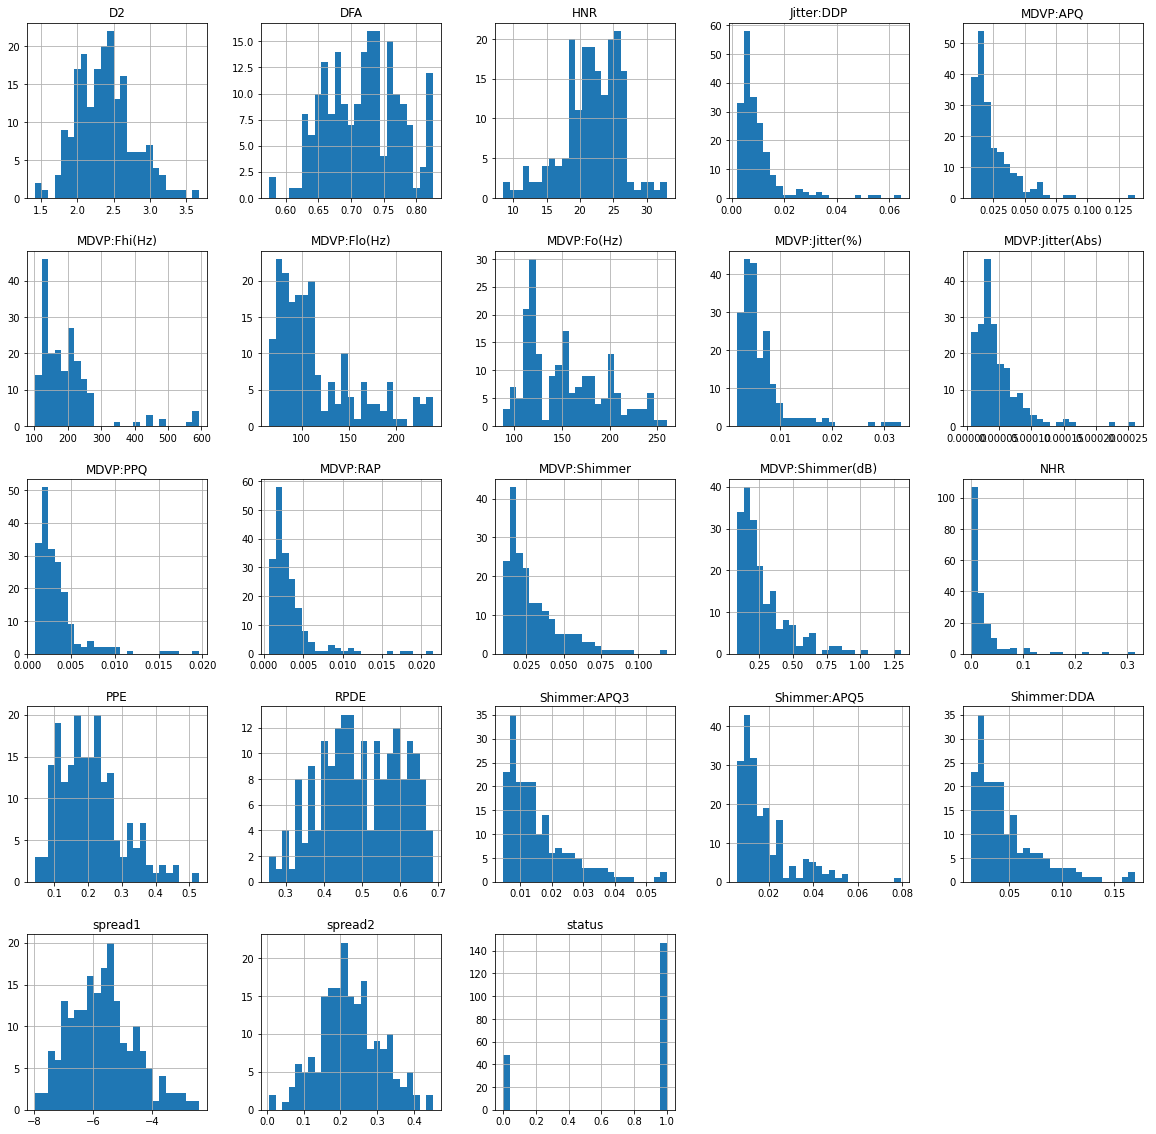

In [4]:
# Plot histograms with 25 bins
dataTable.hist(bins=25, figsize=(20,20))
plt.show()

## Histogram Analysis

Looking at the histograms for each feature we can see that it is all quite all over the place with most of the data skewed to the left. There is no need standardise our data so this is fine as we aren't making assumptions that the data is following a normal distribution. 

However looking at the scale of the data we can see that it varies quite wildly with some data being in decimals of magnitude and others being in hundreds. From this it is obvious that we will need to normalise the data to ensure all the features are defined on the same scale.

# 2. Data Split & Normalisation

Here we will split the dataset 80/20 for training and testing followed by normalising the data.

In [5]:
trainData, testData = train_test_split(dataTable, test_size=0.2, random_state=0)
trainData = trainData.copy()
trainData.reset_index(drop = True)
testData = testData.copy()
testData.reset_index(drop = True)
trainData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
26,phon_R01_S06_3,171.041,208.313,75.501,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,0.186,0.00889,0.01169,0.01872,0.02666,0.01095,25.908,1,0.418622,0.720916,-6.183590,0.226278,2.589702,0.147403
139,phon_R01_S33_6,116.150,131.731,109.815,0.00381,0.00003,0.00181,0.00232,0.00542,0.03026,0.267,0.01514,0.01812,0.02770,0.04543,0.01827,18.801,1,0.624811,0.696049,-5.866357,0.233070,2.445646,0.184985
143,phon_R01_S34_4,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,0.01117,0.01177,0.01506,0.03350,0.02010,18.687,1,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
71,phon_R01_S18_6,136.358,176.595,65.750,0.00971,0.00007,0.00534,0.00478,0.01601,0.04978,0.483,0.02749,0.02466,0.03736,0.08247,0.03361,18.570,1,0.543299,0.733232,-5.207985,0.224852,2.642276,0.242981
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571


In [6]:
testData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
83,phon_R01_S20_6,98.804,102.305,87.804,0.00432,0.000040,0.00247,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.244,1,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275
12,phon_R01_S04_1,136.926,159.866,131.276,0.00293,0.000020,0.00118,0.00153,0.00355,0.01259,0.112,0.00656,0.00717,0.01140,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
33,phon_R01_S07_4,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
113,phon_R01_S26_5,210.141,232.706,185.258,0.00534,0.000030,0.00321,0.00280,0.00964,0.01680,0.149,0.00861,0.01017,0.01301,0.02583,0.00620,23.671,1,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807
171,phon_R01_S43_1,112.547,133.374,105.715,0.00355,0.000030,0.00166,0.00190,0.00499,0.01358,0.129,0.00664,0.00786,0.01140,0.01992,0.00435,26.436,0,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


We are going to run a min max scaler on the features to normalise it. This is to ensure that the data is on a similar scale so one feature isn't more highly weighted than another.

In [0]:
# Function for min max normalisation for preprocessing the data, this is done seperately from the pipeline
# because the testing data needs to be transformed by the training data's fit function to keep it relatively the same.
def minMaxPreProcess(data):
    scaler = preprocessing.MinMaxScaler()
    for col in data.columns:
        if ('name' not in col) and ('status' not in col):
            data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [8]:
minMaxPreProcess(trainData)
trainData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
26,phon_R01_S06_3,0.481499,0.216720,0.058344,0.089433,0.090909,0.084582,0.074114,0.084568,0.092055,0.082991,0.083590,0.081275,0.087803,0.083579,0.032785,0.709868,1,0.367661,0.584185,0.322077,0.495260,0.586032,0.213045
139,phon_R01_S33_6,0.161941,0.060394,0.258044,0.065882,0.090909,0.051232,0.073040,0.051063,0.188858,0.149548,0.203968,0.168521,0.156604,0.204070,0.056084,0.421036,1,0.856844,0.485116,0.379433,0.510550,0.513655,0.290882
143,phon_R01_S34_4,0.666418,0.264068,0.120796,0.062381,0.051383,0.055099,0.061762,0.055251,0.094886,0.078061,0.127504,0.082361,0.059761,0.127487,0.061909,0.416403,1,0.646382,0.232461,0.373590,0.466164,0.526266,0.299264
71,phon_R01_S18_6,0.279586,0.151974,0.001595,0.253660,0.249012,0.221846,0.205156,0.221649,0.367123,0.327034,0.441834,0.257259,0.230616,0.441841,0.104911,0.411648,1,0.663457,0.633252,0.498467,0.492050,0.612446,0.410999
8,phon_R01_S02_3,0.043063,0.061082,0.152933,0.119987,0.209486,0.105365,0.126745,0.105509,0.103653,0.087099,0.119029,0.095929,0.075927,0.119014,0.031989,0.543404,1,0.834874,0.794025,0.445910,0.723731,0.451789,0.387368


In [9]:
minMaxPreProcess(testData)
testData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
83,phon_R01_S20_6,0.018121,0.000000,0.120727,0.236559,0.306931,0.304940,0.203431,0.305335,0.219893,0.234469,0.227798,0.174686,0.165016,0.227820,0.113271,0.498511,1,0.783059,0.734557,0.406216,0.166777,0.239352,0.341999
12,phon_R01_S04_1,0.274173,0.338783,0.373252,0.112007,0.108911,0.085179,0.074755,0.085698,0.052850,0.054108,0.052721,0.026310,0.083399,0.052726,0.071179,0.664665,1,0.499158,0.101513,0.279325,0.375864,0.233556,0.232559
33,phon_R01_S07_4,0.713038,0.643295,0.755497,0.010753,0.000000,0.042589,0.018382,0.041998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,0.273922,0.581889,0.000000,0.447960,0.000000,0.000000
113,phon_R01_S26_5,0.765932,0.767494,0.686829,0.327957,0.207921,0.431005,0.230392,0.431328,0.125801,0.128257,0.110516,0.097416,0.115293,0.110526,0.076633,0.567057,1,0.451444,0.481672,0.421374,0.649010,0.444186,0.343501
171,phon_R01_S43_1,0.110428,0.182861,0.224770,0.167563,0.207921,0.166951,0.120098,0.167423,0.070005,0.088176,0.054976,0.042664,0.083399,0.054981,0.050762,0.699875,0,0.383427,0.655327,0.333706,0.561021,0.305097,0.294288


# 3. Random Forest Classifier Default Hyperparameters

Here I'm using a random forest classifier with the default hyperparameters while also setting the random state to ensure that the results are consistent and deterministic.

In [10]:
# Setting up the machine learning data and fitting it.
trainX = trainData[trainData.columns.difference(['name', 'status'])]
trainY = trainData['status'].tolist()
rf1Class = RandomForestClassifier(random_state=0).fit(trainX, trainY)
print(rf1Class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [11]:
# Testing the model with the testing data, it has about 92% accuracy.
testX = testData[testData.columns.difference(['name', 'status'])]
testY = testData['status'].tolist()
testYPredrf1 = rf1Class.predict(testX)
print("The accuracy of the model is", rf1Class.score(testX,testY))

The accuracy of the model is 0.9230769230769231


### Confusion Matrix

Using the default hyperparameters we can see that the accuracy is quite high at 92.3% and the F1 score is even better at 0.95. Looking at the diagonal in the confusion matrix we can see again that there is a large proportion of true positives.

Looking at what the default variables means we can see that the default parameters revolve around creating as large of a forest as possible. With there being no max depth meaning that all nodes are expanded until they are pure. For this dataset it appears that the tree becomes pure very quickly due to the small amount of data.



[[29  0]
 [ 3  7]]
The F1 score is 0.9508196721311475
The precision score is 0.90625
The recall score is 1.0


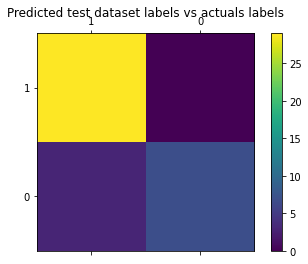

In [12]:
# Set up confusion matrix with test data and labels
rf1ConfMat = confusion_matrix(testY, testYPredrf1, labels=[1, 0])
print(rf1ConfMat)

# Confusion matrix with heatmap
data = rf1ConfMat
classes = ['1', '0']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+classes)
ax.set_yticklabels(['']+classes)
ax.set_title("Predicted test dataset labels vs actuals labels")
plt.show

# Get the precision and recall
f1Score = f1_score(testY, testYPredrf1) 
print("The F1 score is", f1Score)
pScore = precision_score(testY, testYPredrf1) 
print("The precision score is", pScore)
rScore = recall_score(testY, testYPredrf1)
print("The recall score is", rScore)

# 4. Random Forest Classifier Chosen Hyperparameters

This time we will be using the same random forest classifier but instead we will modify the hyperparameters to see what effect it will have on the output. We will be setting max_features, max_samples and n_estimators to lower values than what is used in the defaults.

In [13]:
# Setting up the machine learning and fitting it.
rf2Class = RandomForestClassifier(random_state=0, max_features=0.1, max_samples=0.1, n_estimators=5).fit(trainX, trainY)
print(rf2Class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=0.1,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [14]:
# Testing the model with the testing data, it has about 82% accuracy.
testYPredrf2 = rf2Class.predict(testX)
print("The accuracy of the model is", rf2Class.score(testX,testY))

The accuracy of the model is 0.8205128205128205


### Confusion Matrix

Looking at the results we can see right away that the classifier has performed a lot worse than in the previous one. This one has an accuracy of 82% and 0.88 F1 score which is respectable but neverless worse than the default.

Looking at why this is the case we can see that setting the hyperparameters of max_features, max_samples and n_estimators to be lower values means we have limited the grow and size of the random forests which means it is more likely to overlook features that are important for classification.

Max_features controls the number of features to be considered when looking for the best split, setting this to 0.1 means that only 0.1 of the number of features will be considered which means less diversity and reach of the tree.

Max_samples controls the number of samples to draw from the data to train each estimator, setting this to a low number such as 0.1 again makes the tree more limited.

N_estimators controls the number of trees in the forest, the default is 100 but by setting it to 5 it again limits the number of voters in the ensemble. This hurts the accuracy of the classifier.

[[27  2]
 [ 5  5]]
The F1 score is 0.8852459016393444
The precision score is 0.84375
The recall score is 0.9310344827586207


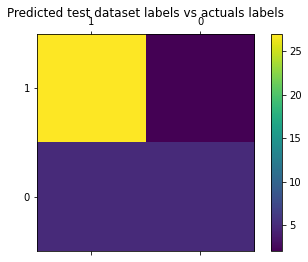

In [15]:
# Set up confusion matrix with test data and labels
rf2ConfMat = confusion_matrix(testY, testYPredrf2, labels=[1, 0])
print(rf2ConfMat)

# Confusion matrix with heatmap
data = rf2ConfMat
classes = ['1', '0']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+classes)
ax.set_yticklabels(['']+classes)
ax.set_title("Predicted test dataset labels vs actuals labels")
plt.show

# Get the precision and recall
f1Score = f1_score(testY, testYPredrf2) 
print("The F1 score is", f1Score)
pScore = precision_score(testY, testYPredrf2) 
print("The precision score is", pScore)
rScore = recall_score(testY, testYPredrf2)
print("The recall score is", rScore)

# 5. Conclusion

Looking at the comparison between the two classifiers we can see that allowing the tree and forest to grow as large as possible is the key to getting good results for the classification. When this is limited, the results are distinctly worse. 

# 6. Citations

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)